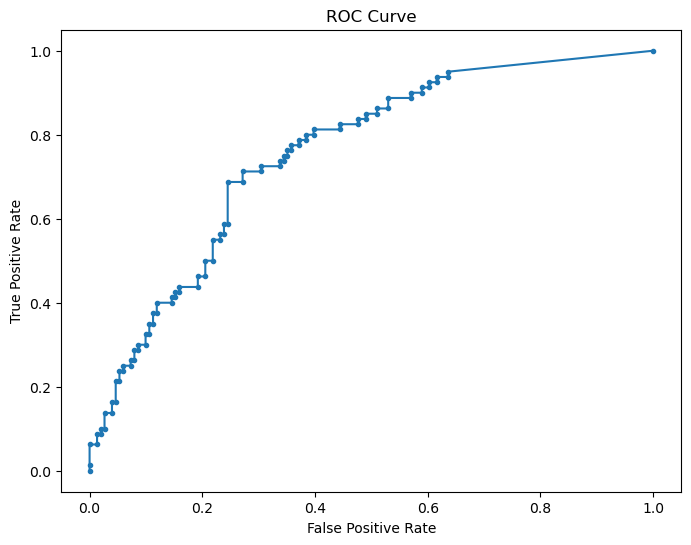

Best Parameters:
{'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'distance'}

Confusion Matrix:
[[119  32]
 [ 40  40]]

Accuracy: 0.6883116883116883
Precision: 0.5555555555555556
Recall: 0.5
F1 Score: 0.5263157894736842
ROC AUC Score: 0.7574503311258278


In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Veri setini yükleme
file_path = 'veri-seti.txt'  # Dosya yolunu doğru şekilde belirtin
df = pd.read_csv(file_path, sep="\t")

# Eğitim ve test setlerine ayırma
train_df, test_df = train_test_split(df, test_size=0.3, random_state=42)

# Özellikler ve hedef değişken ayırma
X_train = train_df.drop('Class', axis=1)
y_train = train_df['Class']
X_test = test_df.drop('Class', axis=1)
y_test = test_df['Class']

# Normalizasyon (Standartlaştırma)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# KNN modeli için en iyi k değerini belirlemek ve optimizasyon yapmak
param_grid = {
    'n_neighbors': range(1, 31),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

# GridSearchCV uygulama
knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

# En iyi parametreleri bulma
best_params = grid_search.best_params_

# En iyi parametrelerle modeli eğitme
knn_best = KNeighborsClassifier(**best_params)
knn_best.fit(X_train_scaled, y_train)
y_pred_best = knn_best.predict(X_test_scaled)
y_proba_best = knn_best.predict_proba(X_test_scaled)[:, 1]

# Performans metriklerini hesaplama
conf_matrix_best = confusion_matrix(y_test, y_pred_best)
accuracy_best = accuracy_score(y_test, y_pred_best)
precision_best = precision_score(y_test, y_pred_best)
recall_best = recall_score(y_test, y_pred_best)
f1_best = f1_score(y_test, y_pred_best)
roc_auc_best = roc_auc_score(y_test, y_proba_best)

# ROC eğrisi
fpr, tpr, _ = roc_curve(y_test, y_proba_best)

# ROC eğrisi çizimi
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

# Sonuçları döndürme
print("Best Parameters:")
print(best_params)
print("\nConfusion Matrix:")
print(conf_matrix_best)
print(f"\nAccuracy: {accuracy_best}")
print(f"Precision: {precision_best}")
print(f"Recall: {recall_best}")
print(f"F1 Score: {f1_best}")
print(f"ROC AUC Score: {roc_auc_best}")
